# OpenEO: Sentinel 1 

Connection to VITO backend for cloud computing

In [11]:
import openeo
import geopandas as gpd
from pathlib import Path
import numpy as np
import pickle
import xarray as xr
import rioxarray
import hvplot.xarray
import hvplot.dask
import os
connection = openeo.connect("openeo.cloud").authenticate_oidc()
pad = Path(os.getcwd())
if pad.name != "Python":
    pad_correct = Path("../../Python")
    os.chdir(pad_correct)
#set all of the parameters below to True to execute cloud computing and downloading    
overwrite = True
read = False
job_exec =  True
download = False
write_out = False

Authenticated using refresh token.


Load in the Shapefile of the Zwalm in EPSG:4326

[ 3.66751526 50.76325563  3.83821038 50.90341411]


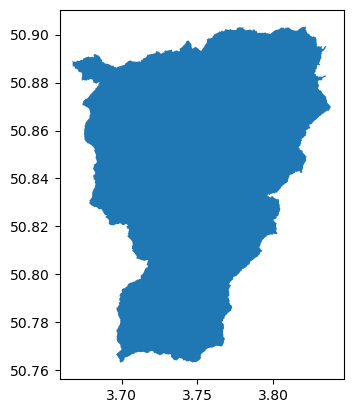

In [4]:
shape_zwalm = gpd.read_file('data/Zwalm_shape/zwalm_shapefile_emma.shp')
shape_zwalm.plot()
extent = shape_zwalm.total_bounds
print(extent)

In [8]:
#connection.list_collections()

In [7]:
connection.describe_collection('SENTINEL1_GRD')
#connection.describe_collection('S1_GRD_SIGMA0_ASCENDING')

{'assets': {'thumbnail': {'href': 'https://collections.eurodatacube.com/sentinel-1-grd/sentinel-1-grd.png',
   'roles': ['thumbnail'],
   'title': 'Thumbnail',
   'type': 'image/png'}},
 'crs': ['http://www.opengis.net/def/crs/OGC/1.3/CRS84',
  'http://www.opengis.net/def/crs/EPSG/0/2154',
  'http://www.opengis.net/def/crs/EPSG/0/2180',
  'http://www.opengis.net/def/crs/EPSG/0/2193',
  'http://www.opengis.net/def/crs/EPSG/0/3003',
  'http://www.opengis.net/def/crs/EPSG/0/3004',
  'http://www.opengis.net/def/crs/EPSG/0/3031',
  'http://www.opengis.net/def/crs/EPSG/0/3035',
  'http://www.opengis.net/def/crs/EPSG/0/4326',
  'http://www.opengis.net/def/crs/EPSG/0/4346',
  'http://www.opengis.net/def/crs/EPSG/0/4416',
  'http://www.opengis.net/def/crs/EPSG/0/4765',
  'http://www.opengis.net/def/crs/EPSG/0/4794',
  'http://www.opengis.net/def/crs/EPSG/0/4844',
  'http://www.opengis.net/def/crs/EPSG/0/4857',
  'http://www.opengis.net/def/crs/EPSG/0/3912',
  'http://www.opengis.net/def/crs/EPSG/0/3995',
  'http://www.opengis.net/def/crs/EPSG/0/4026',
  'http://www.opengis.net/def/crs/EPSG/0/5514',
  'http://www.opengis.net/def/crs/EPSG/0/28992',
  'http://www.opengis.net/def/crs/EPSG/0/32601',
  'http://www.opengis.net/def/crs/EPSG/0/32602',
  'http://www.opengis.net/def/crs/EPSG/0/32603',
  'http://www.opengis.net/def/crs/EPSG/0/32604',
  'http://www.opengis.net/def/crs/EPSG/0/32605',
  'http://www.opengis.net/def/crs/EPSG/0/32606',
  'http://www.opengis.net/def/crs/EPSG/0/32607',
  'http://www.opengis.net/def/crs/EPSG/0/32608',
  'http://www.opengis.net/def/crs/EPSG/0/32609',
  'http://www.opengis.net/def/crs/EPSG/0/32610',
  'http://www.opengis.net/def/crs/EPSG/0/32611',
  'http://www.opengis.net/def/crs/EPSG/0/32612',
  'http://www.opengis.net/def/crs/EPSG/0/32613',
  'http://www.opengis.net/def/crs/EPSG/0/32614',
  'http://www.opengis.net/def/crs/EPSG/0/32615',
  'http://www.opengis.net/def/crs/EPSG/0/32616',
  'http://www.opengis.net/def/crs/EPSG/0/32617',
  'http://www.opengis.net/def/crs/EPSG/0/32618',
  'http://www.opengis.net/def/crs/EPSG/0/32619',
  'http://www.opengis.net/def/crs/EPSG/0/32620',
  'http://www.opengis.net/def/crs/EPSG/0/32621',
  'http://www.opengis.net/def/crs/EPSG/0/32622',
  'http://www.opengis.net/def/crs/EPSG/0/32623',
  'http://www.opengis.net/def/crs/EPSG/0/32624',
  'http://www.opengis.net/def/crs/EPSG/0/32625',
  'http://www.opengis.net/def/crs/EPSG/0/32626',
  'http://www.opengis.net/def/crs/EPSG/0/32627',
  'http://www.opengis.net/def/crs/EPSG/0/32628',
  'http://www.opengis.net/def/crs/EPSG/0/32629',
  'http://www.opengis.net/def/crs/EPSG/0/32630',
  'http://www.opengis.net/def/crs/EPSG/0/32631',
  'http://www.opengis.net/def/crs/EPSG/0/32632',
  'http://www.opengis.net/def/crs/EPSG/0/32633',
  'http://www.opengis.net/def/crs/EPSG/0/32634',
  'http://www.opengis.net/def/crs/EPSG/0/32635',
  'http://www.opengis.net/def/crs/EPSG/0/32636',
  'http://www.opengis.net/def/crs/EPSG/0/32637',
  'http://www.opengis.net/def/crs/EPSG/0/32638',
  'http://www.opengis.net/def/crs/EPSG/0/32639',
  'http://www.opengis.net/def/crs/EPSG/0/32640',
  'http://www.opengis.net/def/crs/EPSG/0/32641',
  'http://www.opengis.net/def/crs/EPSG/0/32642',
  'http://www.opengis.net/def/crs/EPSG/0/32643',
  'http://www.opengis.net/def/crs/EPSG/0/32644',
  'http://www.opengis.net/def/crs/EPSG/0/32645',
  'http://www.opengis.net/def/crs/EPSG/0/32646',
  'http://www.opengis.net/def/crs/EPSG/0/32647',
  'http://www.opengis.net/def/crs/EPSG/0/32648',
  'http://www.opengis.net/def/crs/EPSG/0/32649',
  'http://www.opengis.net/def/crs/EPSG/0/32650',
  'http://www.opengis.net/def/crs/EPSG/0/32651',
  'http://www.opengis.net/def/crs/EPSG/0/32652',
  'http://www.opengis.net/def/crs/EPSG/0/32653',
  'http://www.opengis.net/def/crs/EPSG/0/32654',
  'http://www.opengis.net/def/crs/EPSG/0/32655',
  'http://www.opengis.net/def/crs/EPSG/0/32656',
  'http://www.opengis.net/def/crs/EPSG/0/32657',
  'http://www.opengis.net/def/crs/EPSG/0/32658',
  

Splitting the temporal extent in to 1 year at a time

In [14]:
temporal_extent = ["2015-06-07", "2022-11-05"]
list_temp_extent = []
list_temp_extent.append([temporal_extent[0],"2015-12-31"])
years = np.arange(2016,2023)
for year in np.arange(2016,2023):
    if year == 2022:
        #print([str(year)+"-01-01",temporal_extent[1]])
        list_temp_extent.append([str(year)+"-01-01",temporal_extent[1]])
    else:
        #print([str(year)+"-01-01",str(year)+ "-12-31"])
        list_temp_extent.append([str(year)+"-01-01",str(year)+ "-12-31"])
print(list_temp_extent)

[['2015-06-07', '2015-12-31'], ['2016-01-01', '2016-12-31'], ['2017-01-01', '2017-12-31'], ['2018-01-01', '2018-12-31'], ['2019-01-01', '2019-12-31'], ['2020-01-01', '2020-12-31'], ['2021-01-01', '2021-12-31'], ['2022-01-01', '2022-11-05']]


## Ascending orbit(s)

In [15]:
collection = 'SENTINEL1_GRD' #Ground Range Detected #Ground Range Detected
spatial_extent = {'west':extent[0],'east':extent[2],'south':extent[1],'north':extent[3]}
bands = ["VV"]#enkel in deze geïnteresseerd 
properties = {
    "sat:orbit_state": lambda od: od == "ASCENDING", ##filter on ascending vs descending
    "sar:instrument_mode":lambda mode: mode == "IW" ## Orbit direction filtering
}

In [16]:
years = np.arange(2015,2023)
job_title_list = []
job_id_list = []
if job_exec:
    for i, temporal_extent in enumerate(list_temp_extent):
        s1a = connection.load_collection(
            collection_id = collection,
            spatial_extent= spatial_extent,
            temporal_extent = temporal_extent,
            bands = bands,
            properties= properties
        )
        s1a = s1a.ard_normalized_radar_backscatter(elevation_model = "COPERNICUS_30")
        s1a = s1a.mask_polygon(shape_zwalm['geometry'].values[0])
        job_title = "s1_a-gamm0" +  str(years[i])
        job_title_list.append(job_title)
        job_s1a = s1a.create_job(title = job_title, out_format= 'NetCDF')
        job_s1a_id = job_s1a.job_id
        if job_s1a_id:
            print("Batch job created with id: ",job_s1a_id)
            job_s1a.start_job()
            job_id_list.append(job_s1a_id)
        else:
            print("Error! Job ID is None")

Batch job created with id:  vito-j-2405da976cf0475784a9768b8a6c4692
Batch job created with id:  vito-j-3e278aee8a3349f6b4c665304a495543


OpenEoApiError: [500] Internal: Server error: OpenEoApiError('[500] Internal: Server error: Sentinel Hub returned an error\nresponse: HTTP/1.1 429 Too Many Requests with body: Too many active tasks. Please try later.\nrequest: POST https://services.sentinel-hub.com/api/v1/batch/process/9d5cf985-6ac4-4a2b-8b81-fe9d8860cad2/start with (possibly abbreviated) body:  (ref: r-e7fbbe603b2a498d875c6297671c87d1)') (ref: r-1298a9b5a78d4316a85aac7d57783796)

In [ ]:
if not os.path.exists('data/g0_OpenEO/ascending'):
    os.makedirs('data/g0_OpenEO/ascending')

In [ ]:
if overwrite:
    with open('data/g0_OpenEO/s1_a_job_id_list.pickle', 'wb') as handle:
        pickle.dump(job_id_list, handle, protocol=pickle.HIGHEST_PROTOCOL)
    with open('data/g0_OpenEO/s1_a_job_title_list.pickle', 'wb') as handle:
        pickle.dump(job_title_list, handle, protocol=pickle.HIGHEST_PROTOCOL)

In [ ]:
if read:
    job_id_list = pickle.load(open('data/g0_OpenEO/s1_a_job_id_list.pickle', "rb"))
    job_title_list = pickle.load(open('data/g0_OpenEO/s1_a_job_title_list.pickle', "rb"))

In [ ]:
if download:
    for i,job_id in enumerate(job_id_list):
        job_connection = connection.job(job_id)
        results = job_connection.get_results()
        name_netcdf = job_title_list[i] + '.nc'
        filepath = "data/s0_OpenEO/ascending/" + name_netcdf
        print(filepath)
        results.download_file(filepath)

Read in the downloaded data! 
- scale and offset from https://docs.terrascope.be/DataProducts/Sentinel-1/references/VITO_S1_sigma0_GRD.pdf 

In [ ]:
s1_xr_asc = xr.open_mfdataset('data/s0_OpenEO/ascending/*.nc', decode_coords="all") #automatically chuncked!
s1_xr_asc['VV_db'] = 10 * np.log10(s1_xr_asc['VV'])
scale = 0.0005
offset = 29
s1_xr_asc['angle']  = s1_xr_asc['angle']*scale + offset   
s1_xr_asc

Now only select the values for which sufficient data is present. First check amount of data in a full image

In [ ]:
s1_xr_asc['VV_db'].isel(t=0).plot() #example of a full image

In [ ]:
xr_shape = s1_xr_asc['VV'].shape
print('Shape of the ascending orbits: ' + str(xr_shape))
nr_pixels = xr_shape[1]*xr_shape[2]
print('Number of pixels per timestamp: ' + str(nr_pixels))
nancount = np.sum(np.isnan(s1_xr_asc['VV'].isel(t=0))).values
print('Number of nan-pixels for a full image: ' + str(nancount))
nan_cutoff = nancount/nr_pixels
print('Percentage of nan-pixels in a full image: ' + str(nan_cutoff*100) + '%')
#add 5% as safety margin to cutoff
nan_cutoff = nan_cutoff + 0.05

In [ ]:
nr_timestemps_ascending = xr_shape[0]
bool_full_image = []
for i in range(nr_timestemps_ascending):
    VV_ds = s1_xr_asc['VV'].isel(t=i)
    temp_nancount = np.sum(np.isnan(VV_ds)).values
    nan_frac = temp_nancount/nr_pixels
    if nan_frac > nan_cutoff:
        bool_full_image.append(0)
    else:
        bool_full_image.append(1)

In [ ]:
pos_full = np.where(bool_full_image)[0].tolist()

In [ ]:
#add orbit direction
da = xr.DataArray(
    data = np.repeat('ascending',nr_timestemps_ascending),
    dims = ['t'],
    coords = dict(t = s1_xr_asc['t'].values)
)
s1_xr_asc['Orbitdirection'] = da

In [ ]:
s1_xr_asc_full = s1_xr_asc.isel(t = pos_full)
s1_xr_asc_full

In [ ]:
s1_xr_asc_full['VV_db'].hvplot.image('x','y', geo = True, crs = 32631, tiles = 'OSM', cmap = 'bwr', width = 400, rasterize = True)

## Descending orbit(s)

In [ ]:
collection = "S1_GRD_SIGMA0_DESCENDING"
years = np.arange(2015,2023)
job_title_list_d = []
job_id_list_d = []
if job_exec:
    for i, temporal_extent in enumerate(list_temp_extent):
        s1d = connection.load_collection(
            collection_id = collection,
            spatial_extent= spatial_extent,
            temporal_extent = temporal_extent,
            bands = bands
        )
        s1d = s1d.mask_polygon(shape_zwalm['geometry'].values[0])
        job_title = "s1_d_terrascope-" +  str(years[i])
        job_title_list_d.append(job_title)
        job_s1d = s1d.create_job(title = job_title, out_format= 'NetCDF')
        job_s1d_id = job_s1d.job_id
        if job_s1d_id:
            print("Batch job created with id: ",job_s1d_id)
            job_s1d.start_job()
            job_id_list_d.append(job_s1d_id)
        else:
            print("Error! Job ID is None")

In [ ]:
if overwrite:
    with open('data/S0_OpenEO/s1_d_job_id_list.pickle', 'wb') as handle:
        pickle.dump(job_id_list_d, handle, protocol=pickle.HIGHEST_PROTOCOL)
    with open('data/S0_OpenEO/s1_d_job_title_list.pickle', 'wb') as handle:
        pickle.dump(job_title_list_d, handle, protocol=pickle.HIGHEST_PROTOCOL)

In [ ]:
if read:
    job_id_list_d = pickle.load(open('data/S0_OpenEO/s1_d_job_id_list.pickle', "rb"))
    job_title_list_d = pickle.load(open('data/S0_OpenEO/s1_d_job_title_list.pickle', "rb"))

In [ ]:
if not os.path.exists('data/s0_OpenEO/descending'):
    os.makedirs('data/s0_OpenEO/descending')
if download:
    for i,job_id in enumerate(job_id_list_d):
        job_connection = connection.job(job_id)
        results = job_connection.get_results()
        name_netcdf = job_title_list_d[i] + '.nc'
        filepath = "data/s0_OpenEO/descending/" + name_netcdf
        print(filepath)
        results.download_file(filepath)

Analogous processing as for ascending

In [ ]:
s1_xr_desc = xr.open_mfdataset('data/s0_OpenEO/descending/*.nc', decode_coords="all") #automatically chuncked!
s1_xr_desc['VV_db'] = 10 * np.log10(s1_xr_desc['VV'])
s1_xr_desc['angle']  = s1_xr_desc['angle']*scale + offset   
display(s1_xr_desc)
xr_shape_desc = s1_xr_desc['VV'].shape
#only full images selected
nr_timestemps_descending = xr_shape_desc[0]
bool_full_image = []
for i in range(nr_timestemps_descending):
    VV_ds = s1_xr_desc['VV'].isel(t=i)
    temp_nancount = np.sum(np.isnan(VV_ds)).values
    nan_frac = temp_nancount/nr_pixels
    if nan_frac > nan_cutoff:
        bool_full_image.append(0)
    else:
        bool_full_image.append(1)
pos_full = np.where(bool_full_image)[0].tolist()

#add orbit direction
da = xr.DataArray(
    data = np.repeat('descending',nr_timestemps_descending),
    dims = ['t'],
    coords = dict(t = s1_xr_desc['t'].values)
)
s1_xr_desc['Orbitdirection'] = da

s1_xr_desc_full = s1_xr_desc.isel(t= pos_full)
display(s1_xr_desc_full)

In [ ]:
s1_xr_desc_full['VV_db'].hvplot.image('x','y', geo = True, crs = 32631, tiles = 'OSM', cmap = 'bwr', width = 400, rasterize = True)

## Combining orbits

In [ ]:
s1_xr_asc_full.attrs

In [ ]:
#s1_xr_full = xr.combine_by_coords([s1_xr_asc_full,s1_xr_desc_full], coords = ['x','y'])
s1_xr_full = xr.merge([s1_xr_asc_full, s1_xr_desc_full])

In [ ]:
display(s1_xr_full)

In [ ]:
s1_xr_full['VV_db'].hvplot.image('x','y', geo = True, crs = 32631, tiles = 'OSM', cmap = 'bwr', frame_width = 400, rasterize = True)

In [ ]:
write_out = True
if write_out:
    s1_xr_full.to_netcdf('data/S0_OpenEO/S0_zwalm.nc')